c:\Users\antto\miniforge3\envs\ADAML\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([309])) that is different to the input size (torch.Size([309, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [10/1000], Loss: 7989.1768
Epoch [20/1000], Loss: 1994.1937
Epoch [30/1000], Loss: 1209.2069
Epoch [40/1000], Loss: 1423.6825
Epoch [50/1000], Loss: 1246.1343
Epoch [60/1000], Loss: 1167.8690
Epoch [70/1000], Loss: 1179.8638
Epoch [80/1000], Loss: 1170.6942
Epoch [90/1000], Loss: 1167.9789
Epoch [100/1000], Loss: 1168.4347
Epoch [110/1000], Loss: 1167.7880
Epoch [120/1000], Loss: 1167.8270
Epoch [130/1000], Loss: 1167.7828
Epoch [140/1000], Loss: 1167.7701
Epoch [150/1000], Loss: 1167.7704
Epoch [160/1000], Loss: 1167.7672
Epoch [170/1000], Loss: 1167.7675
Epoch [180/1000], Loss: 1167.7670
Epoch [190/1000], Loss: 1167.7671
Epoch [200/1000], Loss: 1167.7671
Epoch [210/1000], Loss: 1167.7671
Epoch [220/1000], Loss: 1167.7671
Epoch [230/1000], Loss: 1167.7671
Epoch [240/1000], Loss: 1167.7671
Epoch [250/1000], Loss: 1167.7671
Epoch [260/1000], Loss: 1167.7671
Epoch [270/1000], Loss: 1167.7671
Epoch [280/1000], Loss: 1167.7671
Epoch [290/1000], Loss: 1167.7671
Epoch [300/1000], Loss:

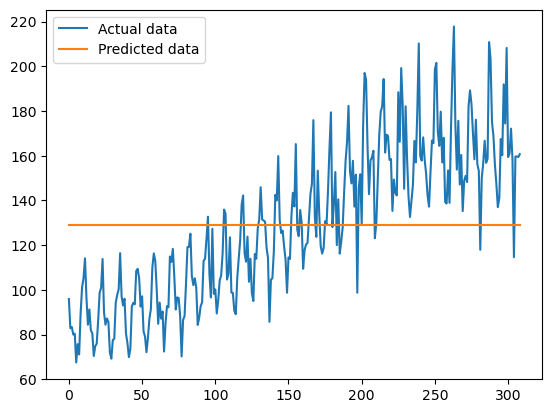

In [55]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
# Define the RNN model
class RNNModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNNModel, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(1, x.size(0), hidden_size).to(x.device)  # Initial hidden state
        out, _ = self.rnn(x, h0)
        out = self.fc(out[:, -1, :])  # We use the last output of the sequence for prediction
        return out



# Parameters

hidden_size = 64
num_layers = 1
num_epochs = 1000
learning_rate = 0.1



df = pd.read_csv('train_data.csv',index_col=0,parse_dates=True)
seq_length = df.shape[1]-1
X = df.iloc[:,:-1].values
X = X.reshape(-1, seq_length, 1)

y = df.iloc[:,-1].values

# Convert to PyTorch tensors
X_train = torch.tensor(X, dtype=torch.float32)
y_train = torch.tensor(y, dtype=torch.float32)

# Initialize model, define loss and optimizer
model = RNNModel(input_size=1, hidden_size=hidden_size, output_size=1)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(num_epochs):
    model.train()
    
    # Forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    
    # Backward pass and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Testing the model
model.eval()
with torch.no_grad():
    test_output = model(X_train).detach().numpy()

# Plot predictions vs actual values
plt.plot(y_train, label='Actual data')
plt.plot(test_output, label='Predicted data')
plt.legend()
plt.show()


In [51]:
import torch
import torch.nn as nn
import numpy as np

# Define the RNN model
class RNNModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNNModel, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(1, x.size(0), hidden_size).to(x.device)  # Initial hidden state
        out, _ = self.rnn(x, h0)
        out = self.fc(out[:, -1, :])  # We use the last output of the sequence for prediction
        return out

# Data preparation
def create_sequences(data, seq_length):
    sequences = []
    labels = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i + seq_length])
        labels.append(data[i + seq_length])
    return np.array(sequences), np.array(labels)

# Example Data (500x1)
x = np.sin(np.linspace(0, 50, 500))  # Just an example time series

seq_length = 10  # Length of the input sequence
X, y = create_sequences(x, seq_length)
print(X.shape,y.shape)

# Convert data to torch tensors
X = torch.Tensor(X).unsqueeze(-1)  # Shape (batch_size, seq_length, 1)
y = torch.Tensor(y)

# Hyperparameters
input_size = 1  # Because we are using a univariate time series
hidden_size = 64
output_size = 1
num_epochs = 100
learning_rate = 0.001

# Model, loss function, and optimizer
model = RNNModel(input_size, hidden_size, output_size)
criterion = nn.MSELoss()  # Mean Squared Error loss for regression
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(num_epochs):
    model.train()
    outputs = model(X)
    loss = criterion(outputs.squeeze(), y)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

# Example prediction
model.eval()
with torch.no_grad():
    test_input = torch.Tensor(x[-seq_length:]).unsqueeze(0).unsqueeze(-1)
    prediction = model(test_input)
    print(f"Predicted next value: {prediction.item()}")


(490, 10) (490,)
Epoch [10/100], Loss: 0.2213
Epoch [20/100], Loss: 0.0748
Epoch [30/100], Loss: 0.0294
Epoch [40/100], Loss: 0.0043
Epoch [50/100], Loss: 0.0016
Epoch [60/100], Loss: 0.0015
Epoch [70/100], Loss: 0.0007
Epoch [80/100], Loss: 0.0007
Epoch [90/100], Loss: 0.0006
Epoch [100/100], Loss: 0.0005
Predicted next value: -0.17793509364128113
